In [1]:
# ! pip install unidecode

<div style="border-width:1; border-radius: 15px; border-style: solid; border-color: rgb(10, 10, 10); background-color: #316B83; text-align: center;font: 14pt 'Candara';font-weight:bold;"><h1> State & Refine QS</h1></div>

#### What is the most paying position in Berlin?

> #### _`QS:`_
>|Set Expectation | Collect Info | Match Results| 
>|----|----|----|
>|Machine Learning engineers with high Seniority level have a high salaries.|<ul><li>Filter the data to get positions in Berlin only</li><li>Get the average Salary For each position in senior level only and sort them</li><li>plot the average for each position in Berlin</li><li>look at the top 5 positions if they contain Machine Learning</li></ul>| |_`Matches`_ |
>|The juniors distribution for the average salaries may be different from the seniors and Middle as in IT Positions , some positions not commmon to need juniors such as Machine learning ,for example compared to frontend developer or software developer in general   |Same data collection but we look in junior seniority level |_`Matches`_ |
>|The heighiest Salary positions in senior level may be similier to middle level | Same data collection but we look in middle seniority level |_`Matches`_ |


In [2]:
from utils import *
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from E_Salary_Cities import *

In [3]:
df_2020,df_2019,df_2018=read()
rename_columns(df_2020,df_2019,df_2018)
df_2018['Position'].value_counts()
df_merged=merge([df_2020,df_2019,df_2018],common_columns=['Position','Salary','City','Seniority level'])

<div style="border-width:1; border-radius: 15px; border-style: solid; border-color: rgb(10, 10, 10); background-color: #316B83; text-align: center;font: 14pt 'Candara';font-weight:bold;"><h1> Explore Data</h1></div>

#### Analysis for each column

In [4]:
############################### CITY ANALYSIS #################################

-  `Expectations : 1. Berlin will have the biggest % as it is capital of Germany`

In [5]:
# Clean the columns 
# check nulls 
pos_nan = count_nan_values(df_merged,'Position')
city_nan = count_nan_values(df_merged,'City')
sal_nan = count_nan_values(df_merged,'Salary')
seniority_nan = count_nan_values(df_merged,'Seniority level')

In [6]:
# Remove nan values and check row col
df_cleaned=df_merged.dropna(inplace=False)

In [7]:

df_cleaned=clean_positions(df_cleaned)


software engineer   [('software engineer', 100), ('ml engineer', 86), ('qa engineer', 86), ('software tester', 75), ('software developer', 74)]
ratios {'software engineer': 100, 'ml engineer': 64, 'qa engineer': 71, 'software tester': 75, 'software developer': 74}
--------------------------------------
backend developer   [('backend developer', 100), ('ios developer', 78), ('frontend developer', 74), ('mobile developer', 73), ('fullstack developer', 72)]
ratios {'backend developer': 100, 'ios developer': 67, 'frontend developer': 74, 'mobile developer': 73, 'fullstack developer': 72}
--------------------------------------
software engineer   [('software engineer', 100), ('ml engineer', 86), ('qa engineer', 86), ('software tester', 75), ('software developer', 74)]
ratios {'software engineer': 100, 'ml engineer': 64, 'qa engineer': 71, 'software tester': 75, 'software developer': 74}
--------------------------------------
frontend developer   [('frontend developer', 100), ('ios developer

In [8]:
# Start cleaning the City column 
df_cleaned=clean_cities(df_cleaned,filter=11)


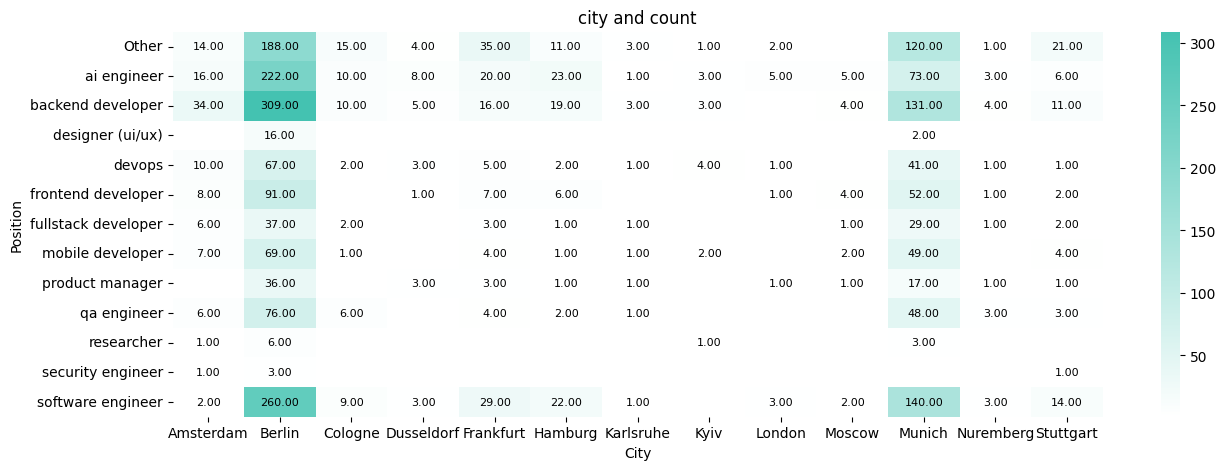

In [9]:
plot_heatmap(df= df_cleaned,x='City',y='Position',title='city and count',value='Salary',x_label='City',y_label='Position',aggfunc='count')

In [10]:
# explore evary Position in every City 

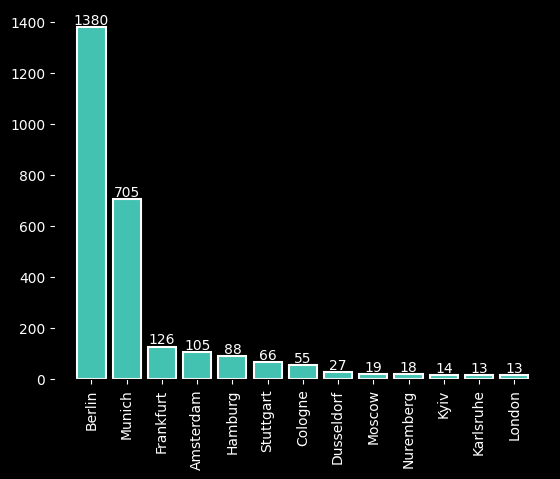

In [11]:
plot_single_histogram(df_cleaned,'City')

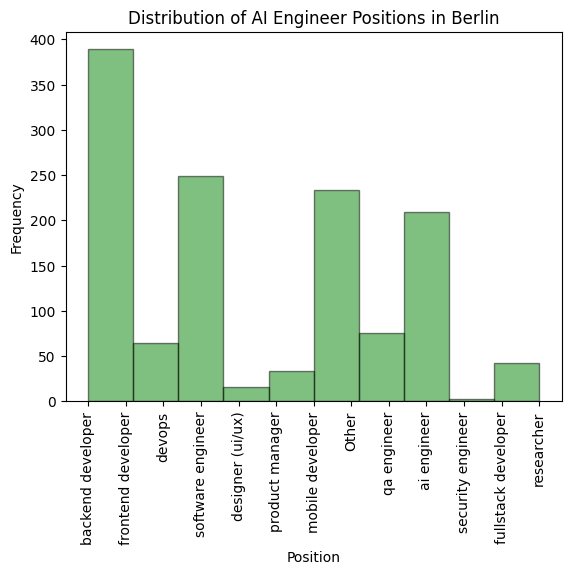

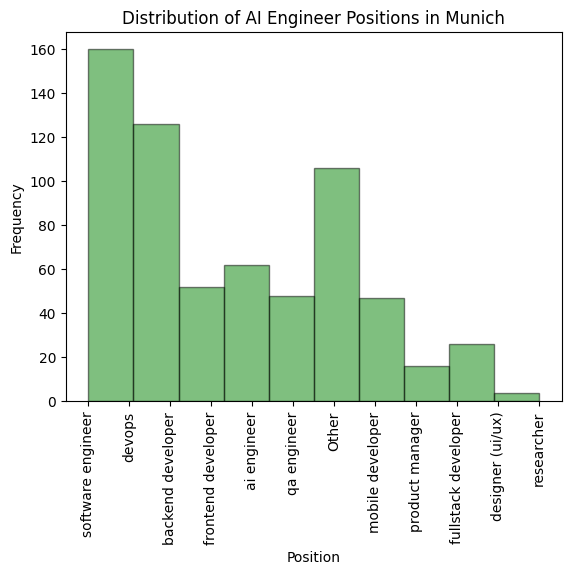

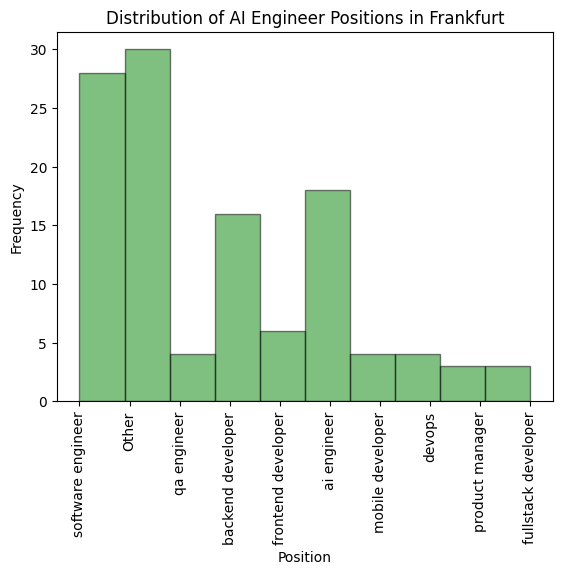

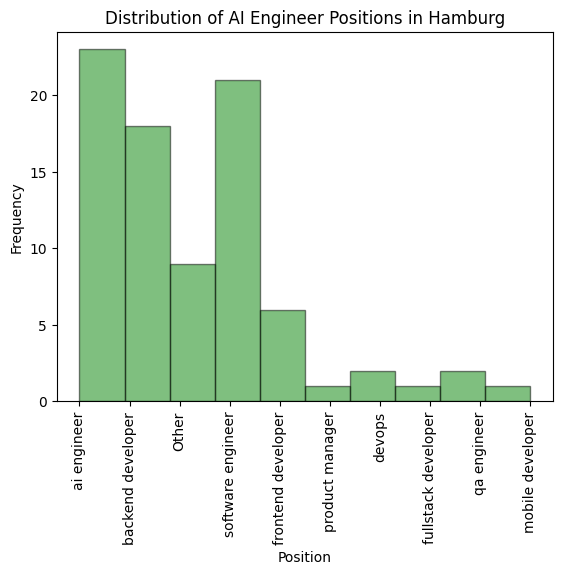

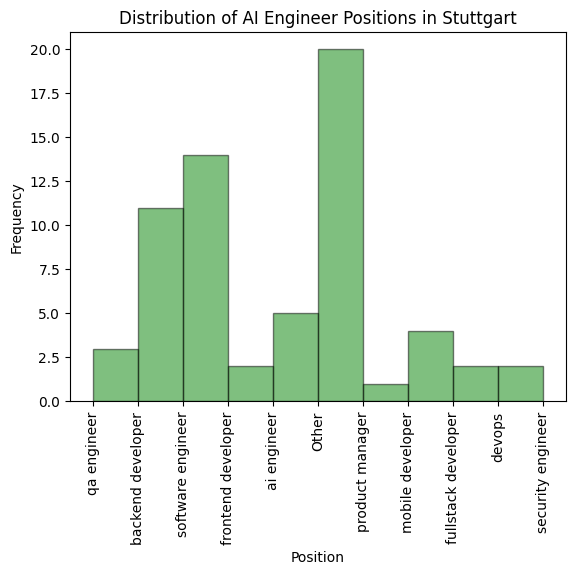

In [12]:
# get the Cities that have ai engineer position count > 10
import pandas as pd
import matplotlib.pyplot as plt

df_cleaned = remove_outliers(df_cleaned,'Salary')
# Get a list of cities with more than 10 AI engineer positions
####################################################################################################
cities = df_cleaned[df_cleaned['Position'] == 'software engineer']['City'].value_counts()
cities = cities[cities > 9].index.tolist()
# Loop over the selected cities and plot histograms
for city in cities:
    positions = df_cleaned[df_cleaned['City'] == city]
    plt.hist(positions['Position'],color='green', alpha=0.5,edgecolor='black')
    plt.title(f"Distribution of AI Engineer Positions in {city}")
    plt.xlabel("Position")
    plt.xticks(rotation=90)
    plt.ylabel("Frequency")
    plt.show()


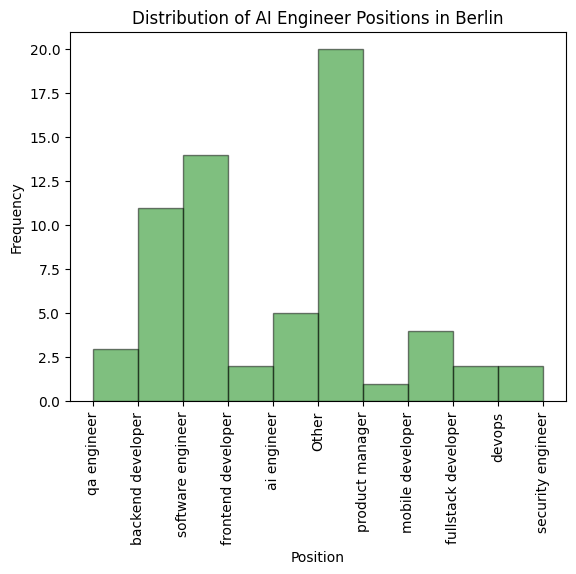

In [20]:
# positions = df_cleaned[df_cleaned['City'] == city]
plt.hist(positions['Position'],color='green', alpha=0.5,edgecolor='black')
plt.title(f"Distribution of AI Engineer Positions in {city}")
plt.xlabel("Position")
plt.xticks(rotation=90)
plt.ylabel("Frequency")
plt.show()

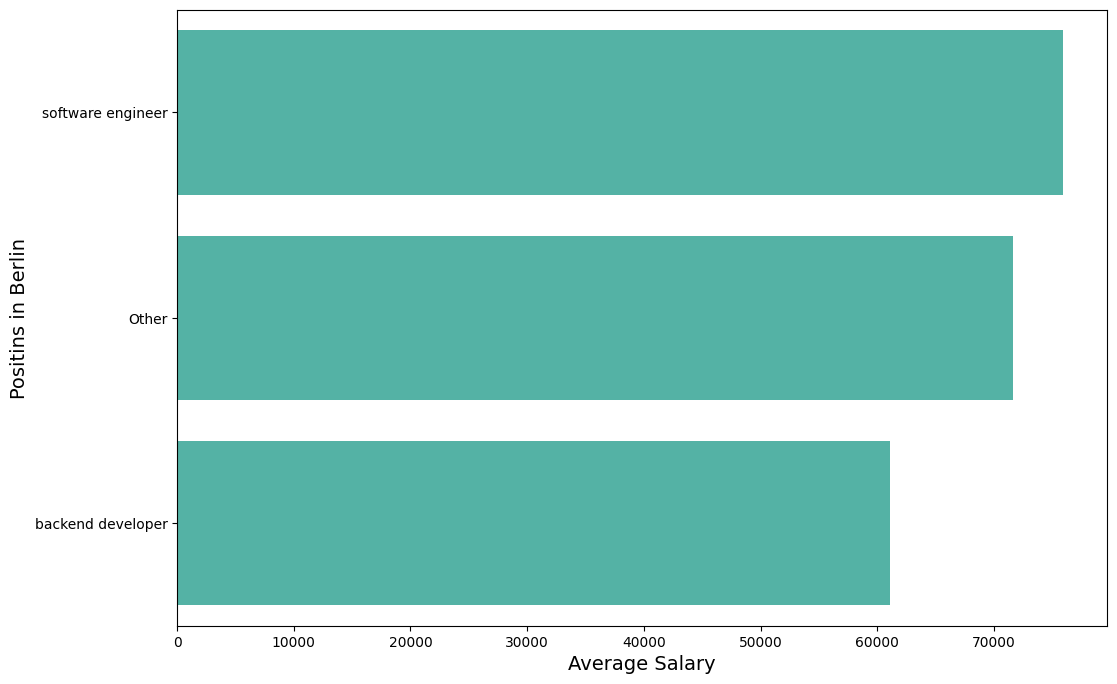

In [22]:
# # filter position less than 10
# df_city =positions.copy()
# pos_count =df_city['Position'].value_counts()
# pos_list = pos_count[pos_count > 9].index.tolist()
# # Loop over the selected cities and plot histograms
# df_city = df_city[df_city['Position'].isin(pos_list)]
# position_salary = df_city.groupby('Position')['Salary'].sum()
# position_salary.sort_values(ascending=False,inplace=True)
# position_avg_salary = (position_salary/ df_city['Position'].value_counts()).sort_values(ascending = False)
# top_position = position_avg_salary.index.to_list()
# plt.figure(figsize=(12,8))
# sns.barplot(y=top_position,x= position_avg_salary,color='#44c2b1')
# plt.xlabel("Average Salary",fontsize=14)
# plt.ylabel("Positins in "+city,fontsize=14)
# plt.show()

In [13]:
# select only these cities 
cities_for_analyses = df_cleaned[df_cleaned['City'].isin(cities)]

In [14]:
def draw_avg_salaries_per_city(df,city):
    df_city = df.copy() 
    df_city = df_city[df_city['City'] == city]
    # filter position less than 10
    pos_count = df_city['Position'].value_counts()
    pos_list = pos_count[pos_count > 9].index.tolist()
    # Loop over the selected cities and plot histograms
    df_city = df_city[df_city['Position'].isin(pos_list)]
    position_salary = df_city.groupby('Position')['Salary'].sum()
    position_salary.sort_values(ascending=False,inplace=True)
    position_avg_salary = (position_salary/ df_city['Position'].value_counts()).sort_values(ascending = False)
    top_position = position_avg_salary.index.to_list()
    plt.figure(figsize=(12,8))
    sns.barplot(y=top_position,x= position_avg_salary,color='#44c2b1')
    plt.xlabel("Average Salary",fontsize=14)
    plt.ylabel("Positins in "+city,fontsize=14)
    plt.show()
    return 


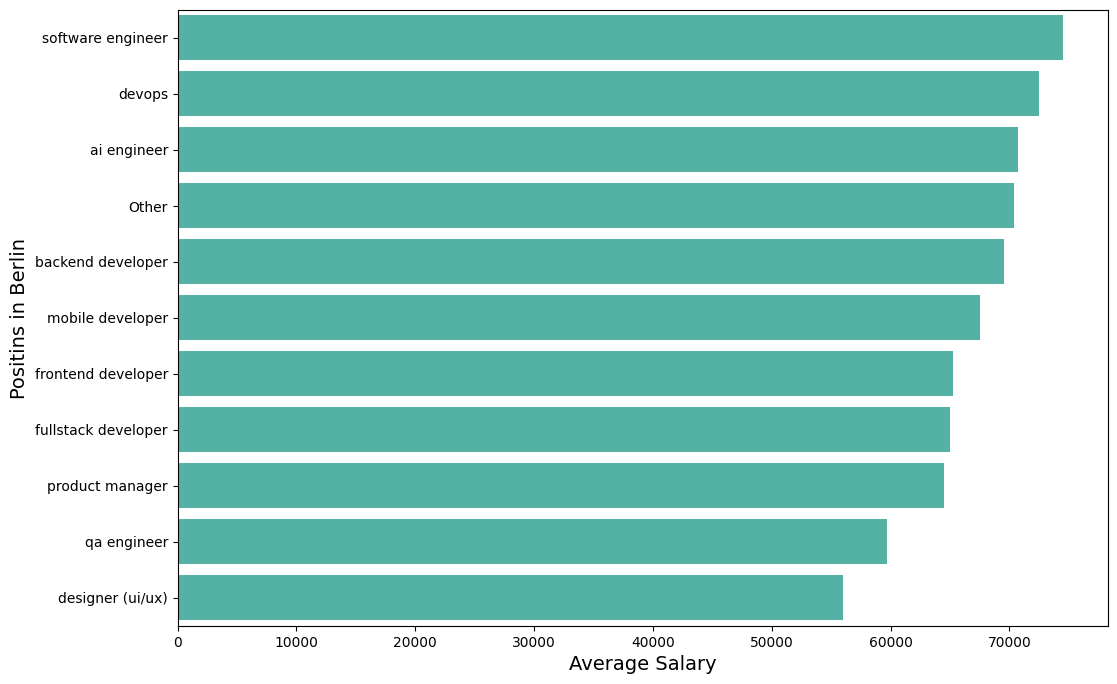

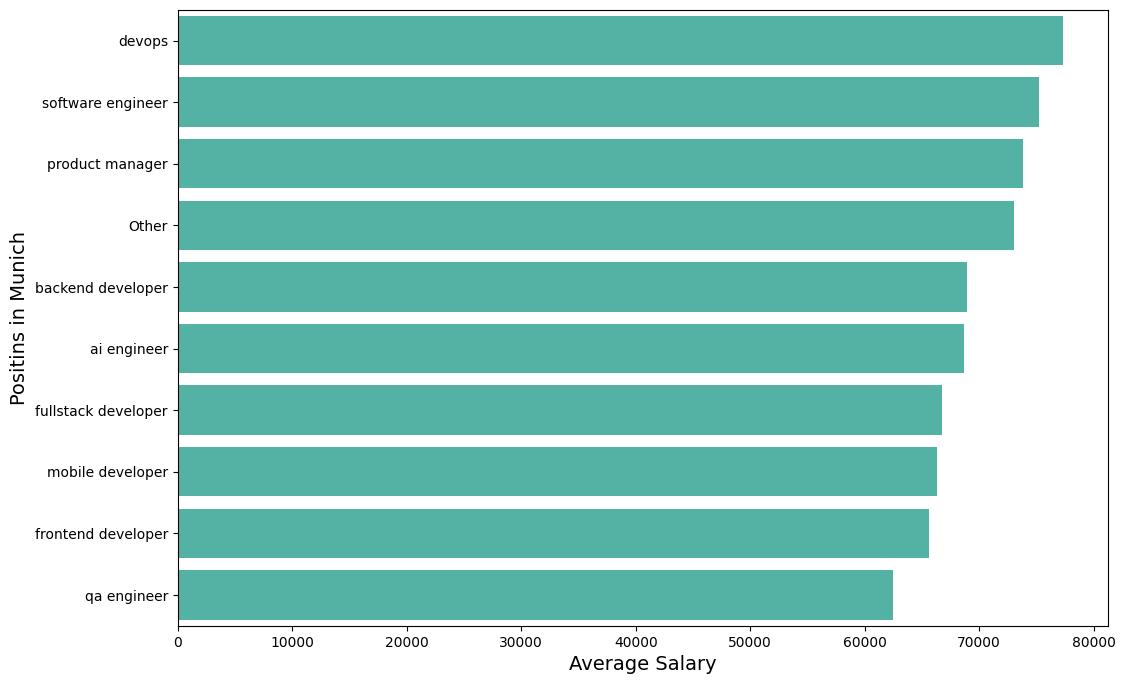

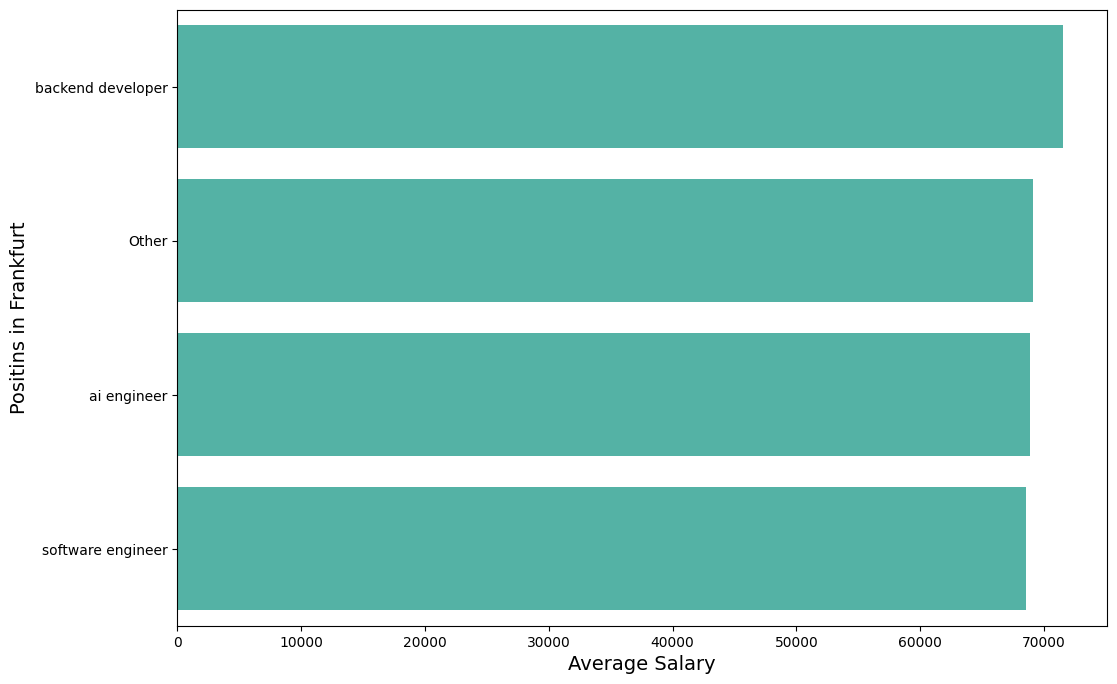

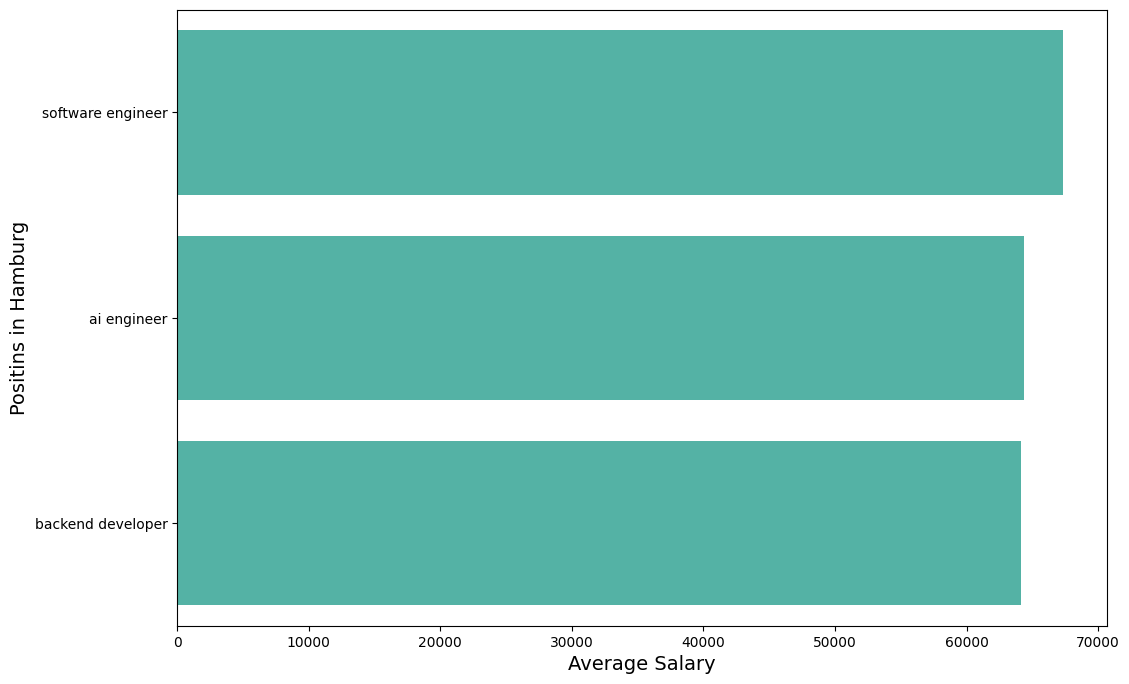

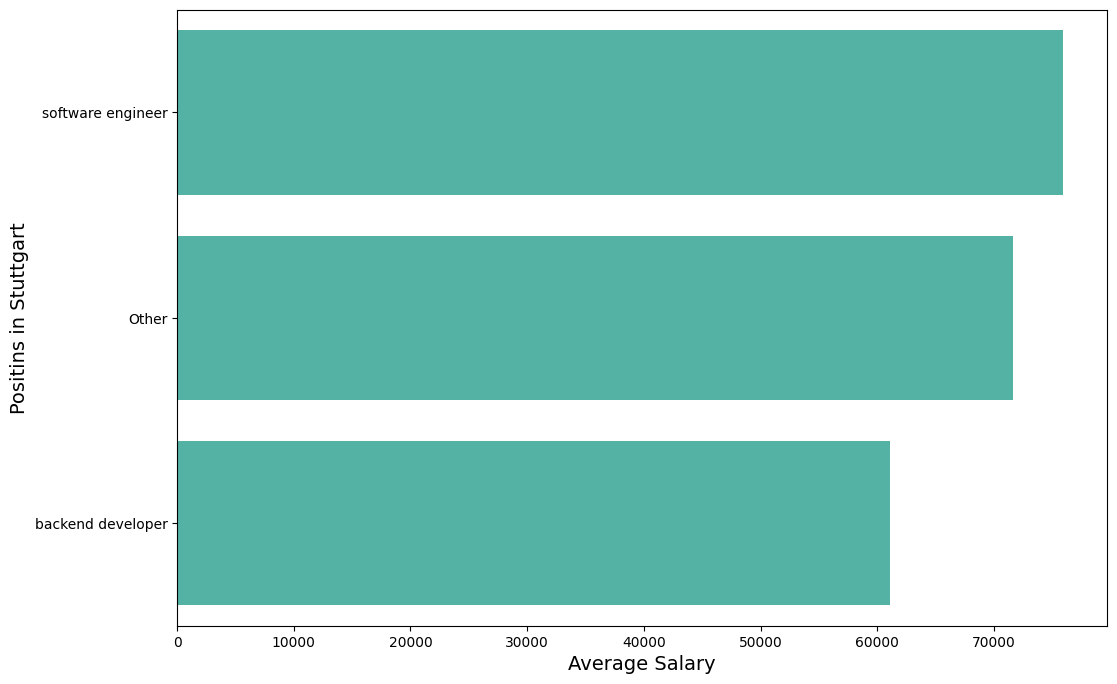

In [15]:
for city in cities:
   draw_avg_salaries_per_city(cities_for_analyses,city)

In [19]:
import pandas as pd
from scipy.stats import ttest_ind
# Identify the position with the highest salary in Berlin
df_city = cities_for_analyses.copy() 
df_city =df_city[df_city['Position'] != 'Other']
city = 'Berlin'
highest_salary =df_city[(df_city['City'] == 'Berlin') & (df_city['Position'] == 'software engineer')]['Salary']
for other_city in cities_for_analyses['City'].unique():
    if other_city != city:
        df_city_pos = df_city[df_city['City'] == other_city]
        pos_count = df_city_pos['Position'].value_counts()
        pos_list = pos_count[pos_count > 9].index.tolist()
        df_city_pos = df_city_pos[df_city_pos['Position'].isin(pos_list)]
        highest_salary =df_city_pos[df_city_pos['Position'] == 'software engineer']['Salary']
        df_city_pos = df_city_pos[df_city_pos['Position'] != 'software engineer']
        pos_city = df_city_pos['Position'].unique()
        print(pos_city)
        for pos in pos_city:
            salary = df_city_pos[df_city_pos['Position'] == pos]['Salary']
            t_statistic, p_value = ttest_ind(highest_salary, salary)
            print(t_statistic)
            if p_value < 0.05:
                print(f"software engineer salary in {other_city} is highest {other_city} (p-value={p_value:.3f})")
            else:
                print(f"software engineer salary in {other_city} is not highest (p-value={p_value:.3f})")
        

['devops' 'backend developer' 'frontend developer' 'ai engineer'
 'qa engineer' 'mobile developer' 'product manager' 'fullstack developer']
-0.8271022778673804
software engineer salary in Munich is not highest (p-value=0.409)
3.90258947599926
software engineer salary in Munich is highest Munich (p-value=0.000)
4.264122172203157
software engineer salary in Munich is highest Munich (p-value=0.000)
3.0265309111489818
software engineer salary in Munich is highest Munich (p-value=0.003)
5.627463607351232
software engineer salary in Munich is highest Munich (p-value=0.000)
4.0980863777763545
software engineer salary in Munich is highest Munich (p-value=0.000)
0.3869000023022908
software engineer salary in Munich is not highest (p-value=0.699)
2.8977196854423353
software engineer salary in Munich is highest Munich (p-value=0.004)
['ai engineer' 'backend developer']
0.707138033443397
software engineer salary in Hamburg is not highest (p-value=0.483)
0.863242335542958
software engineer salary i